<a href="https://colab.research.google.com/github/2203A52043/2203A52043_DAUP/blob/main/2203A52043_DAUP_L6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import kagglehub
import pandas as pd
import os

dataset_path = kagglehub.dataset_download("marusagar/bank-customer-attrition-insights")

for filename in os.listdir(dataset_path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_path, filename)
        break
a = pd.read_csv(csv_file_path)
a.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [26]:
from scipy.stats import skew, kurtosis

numerical_columns = ["CreditScore", "Age", "Balance", "EstimatedSalary", "Point Earned"]
for col in numerical_columns:
    print(f"{col}: Skewness = {skew(a[col])}, Kurtosis = {kurtosis(a[col])}")


CreditScore: Skewness = -0.07159586676212397, Kurtosis = -0.42611279176518124
Age: Skewness = 1.0111685586628079, Kurtosis = 1.3940495456392599
Balance: Skewness = -0.14108754375291138, Kurtosis = -1.489267106315331
EstimatedSalary: Skewness = 0.0020850448448748848, Kurtosis = -1.181527710874237
Point Earned: Skewness = 0.008342861313173992, Kurtosis = -1.1937841772333617


In [27]:
# Selecting key numerical columns
key_numerical_columns = ["Balance", "CreditScore", "NumOfProducts"]

summary_stats = {}
for col in key_numerical_columns:
    summary_stats[col] = {
        "Mean": a[col].mean(),
        "Median": a[col].median(),
        "Standard Deviation": a[col].std(),
        "Skewness": skew(a[col]),
        "Kurtosis": kurtosis(a[col])
    }

# Converting to DataFrame for better visualization
summary_df = pd.DataFrame(summary_stats).T
print(summary_df)


                       Mean    Median  Standard Deviation  Skewness  Kurtosis
Balance        76485.889288  97198.54        62397.405202 -0.141088 -1.489267
CreditScore      650.528800    652.00           96.653299 -0.071596 -0.426113
NumOfProducts      1.530200      1.00            0.581654  0.745456  0.582089


<ipython-input-28-e20db0c9f93b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=a, palette="pastel")
<ipython-input-28-e20db0c9f93b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Geography", data=a, palette="muted")


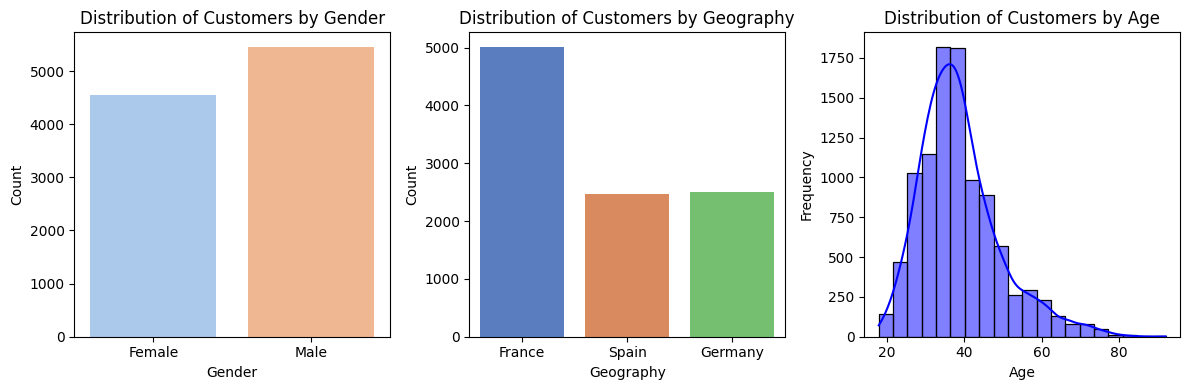

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender Distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.countplot(x="Gender", data=a, palette="pastel")
plt.title("Distribution of Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Geography Distribution
plt.subplot(1, 3, 2)
sns.countplot(x="Geography", data=a, palette="muted")
plt.title("Distribution of Customers by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")

# Age Distribution
plt.subplot(1, 3, 3)
sns.histplot(a["Age"], bins=20, kde=True, color="blue")
plt.title("Distribution of Customers by Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [29]:
# Grouping by Active Membership status
active_summary = a.groupby("IsActiveMember")["NumOfProducts"].agg(["min", "max", "mean"])

# Renaming index for clarity
active_summary.index = ["Inactive", "Active"]

# Displaying the results
print(active_summary)


          min  max      mean
Inactive    1    4  1.524438
Active      1    4  1.535624


In [30]:
# Selecting relevant columns
selected_cols = ["CreditScore", "Balance", "NumOfProducts"]

# Computing correlation matrix
correlation_matrix = a[selected_cols].corr()

# Displaying the correlation matrix
print(correlation_matrix)


               CreditScore   Balance  NumOfProducts
CreditScore       1.000000  0.006268       0.012238
Balance           0.006268  1.000000      -0.304180
NumOfProducts     0.012238 -0.304180       1.000000


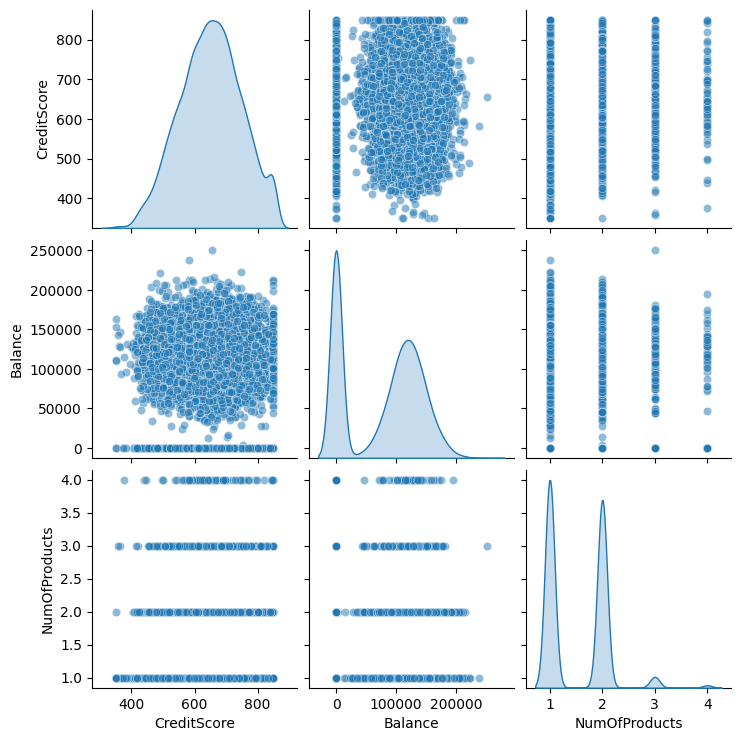

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(a[selected_cols], diag_kind="kde", plot_kws={'alpha':0.5})
plt.show()


In [32]:
# Grouping by churn status (Exited column)
churn_summary = a.groupby("Exited")[["Balance", "NumOfProducts"]].agg(["mean", "median", "min", "max"])

churn_summary.index = ["Stayed", "Churned"]
print(churn_summary)


              Balance                            NumOfProducts               
                 mean     median  min        max          mean median min max
Stayed   72742.750663   92063.06  0.0  221532.80      1.544210    2.0   1   3
Churned  91109.476006  109344.23  0.0  250898.09      1.475466    1.0   1   4


<ipython-input-33-cbe00a1bbf4d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exited", y="Balance", data=a, palette="coolwarm")
<ipython-input-33-cbe00a1bbf4d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exited", y="NumOfProducts", data=a, palette="coolwarm")


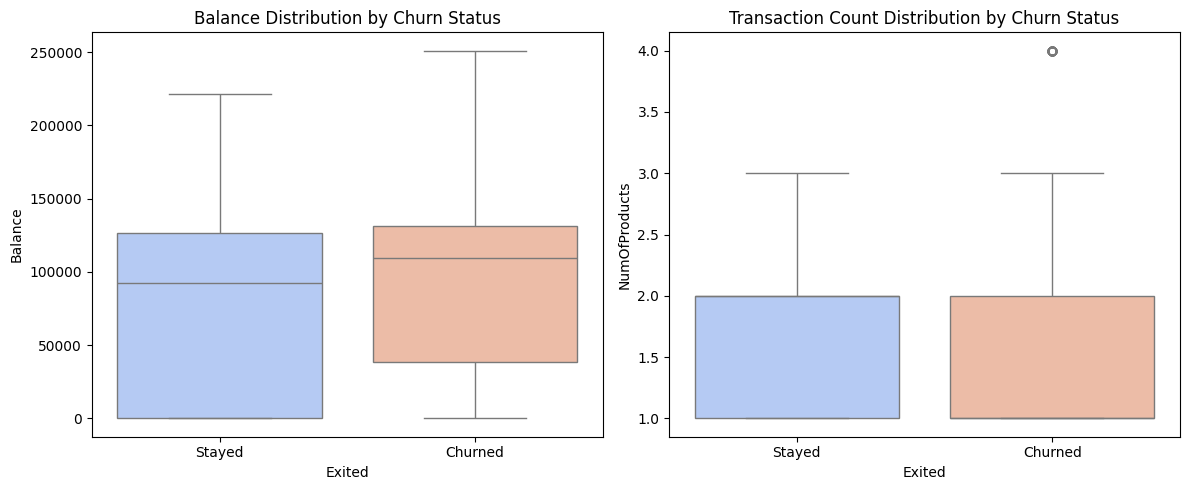

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Balance distribution by churn status
plt.subplot(1, 2, 1)
sns.boxplot(x="Exited", y="Balance", data=a, palette="coolwarm")
plt.xticks([0, 1], ["Stayed", "Churned"])
plt.title("Balance Distribution by Churn Status")

# Transaction count (NumOfProducts) distribution by churn status
plt.subplot(1, 2, 2)
sns.boxplot(x="Exited", y="NumOfProducts", data=a, palette="coolwarm")
plt.xticks([0, 1], ["Stayed", "Churned"])
plt.title("Transaction Count Distribution by Churn Status")

plt.tight_layout()
plt.show()


In [34]:
# Defining thresholds
low_credit_threshold = a["CreditScore"].quantile(0.25)  # 25th percentile
high_balance_threshold = a["Balance"].quantile(0.75)  # 75th percentile

# Filtering customers who meet both conditions
low_credit_high_balance = a[(a["CreditScore"] <= low_credit_threshold) &
                            (a["Balance"] >= high_balance_threshold)]

# Calculating probability
probability = len(low_credit_high_balance) / len(a)

# Displaying results
print(f"Probability that a customer has both a low credit score and a high balance: {probability:.4f}")


Probability that a customer has both a low credit score and a high balance: 0.0638
